In [50]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-50-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


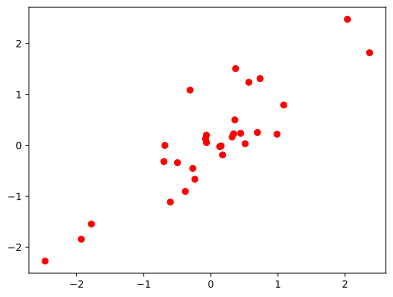

In [51]:
#Create data

N = 30

x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'ro')

In [70]:
ANN_reg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [71]:
learning_rate = 0.05

loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(ANN_reg.parameters(),lr=learning_rate)

In [72]:
epochs = 500
losses = torch.zeros(epochs)

for epochi in range(epochs):

  #forward pass
  y_hat = ANN_reg(x)

  #Loss calculation
  loss = loss_function(y_hat,y)
  losses[epochi] = loss

  #back prop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [73]:
predictions = ANN_reg(x)

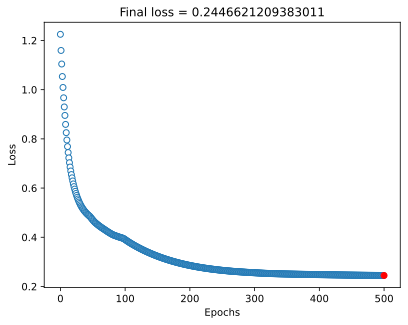

In [78]:

test_loss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o', markerfacecolor = 'w')
plt.plot(epochs,test_loss.detach(),'ro')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f"Final loss = {test_loss.item()}")
plt.show()

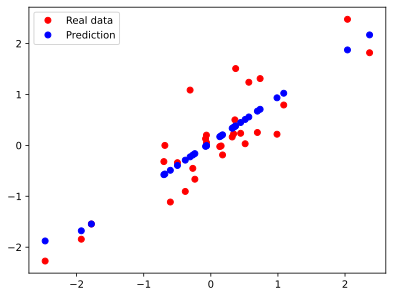

In [82]:
plt.plot(x,y,'ro',label="Real data")
plt.plot(x,predictions.detach(),'bo',label="Prediction")
plt.legend()